In [1]:
#Import the necessary Python moduless
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from geopandas.tools import sjoin
import folium
from folium.plugins import MarkerCluster
from folium import IFrame
import shapely
from shapely.geometry import Point
import unicodedata
import pysal as ps
import branca.colormap as cm

/Users/jonathanclarke/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [9]:
#This is making a choropleth map with the care fragmentation data from the NPJ paper

#May operate using either MSOA or LSOA shapefiles (to improve performance use MSOA)

#Saves out as a html file

level = 'MSOA'

if level == 'MSOA':
    lv = 'Middle'
    lc = 'msoa'
if level == 'LSOA':
    lv = 'Lower'
    lc = 'lsoa'

fp = level+'_SG.shp'
map_df = gpd.read_file(fp)
map_df = map_df.loc[map_df[lc+'11cd'].str[:1] == 'E']
df1 = pd.read_csv(level+' MAP.csv', usecols = [0,3])
df1.columns = [lc+'11cd', 'PC_POSS']
df1['PC_POSS'] = df1['PC_POSS'].round(1)

map_df = pd.merge(map_df,df1,how='left', on=lc+'11cd')
# set a variable that will call whatever column we want to visualise on the map
variable = 'PC_POSS'

poss_map = folium.Map([53.334, -1.275], zoom_start = 6, tiles='Stamen Terrain')
ft = "PC_POSS" 
cmap = cm.linear.RdBu_10.scale(map_df[ft].min(), map_df[ft].max()) 

folium.GeoJson(map_df, name = 'Care Fragmentation ('+level+')', style_function=lambda feature: { 
             'fillColor': cmap(feature['properties'][ft]),'fillOpacity' : 0.7, 'weight' : 0.8, 'color' : 'gray' },
               smooth_factor=2.0,
               tooltip=folium.features.GeoJsonTooltip(fields=[lc+'11cd', 'PC_POSS'],aliases=[level,'Pergentage Fragmentation'], labels=True, sticky=True)                          
              ).add_to(poss_map) 

cmap.caption = 'Percent Fragmentation' 
cmap.add_to(poss_map)
folium.LayerControl().add_to(poss_map)
poss_map.save(outfile=level+'map.html')

In [5]:
poss_map = folium.Map([53.334, -1.275], zoom_start = 6, tiles='Stamen Terrain')
tooltip = 'Click me!'
folium.Marker([53.334, -1.275], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(poss_map)
poss_map.save('Testmap.html')

In [11]:
fp = 'LSOA_SG.shp'
map_df = gpd.read_file(fp)
map_df = map_df.loc[map_df['lsoa11cd'].str[:1] == 'E']
df1 = pd.read_csv('LSOA COMM MAP.csv')
df1.columns = [lc+'11cd', 'CATCHMENT']
map_df = pd.merge(map_df,df1,how='left', on=lc+'11cd')

KeyError: 'lsoa11cd'

In [ ]:
catch = .dissolve(by='continent')

In [19]:
level = 'LSOA'

if level == 'MSOA':
    lv = 'Middle'
    lc = 'msoa'
if level == 'LSOA':
    lv = 'Lower'
    lc = 'lsoa'

fp = level+'_SG.shp'
map_df = gpd.read_file(fp)
map_df = map_df.loc[map_df[lc+'11cd'].str[:1] == 'E']
df1 = pd.read_csv(level+' COMM MAP.csv')
df1.columns = [lc+'11cd', 'CATCHMENT']
map_df = pd.merge(map_df,df1,how='left', on=lc+'11cd')
map_df2 = map_df.dissolve(by='CATCHMENT')
map_df2 = map_df2.reset_index()

In [39]:
map_df2

,CATCHMENT,geometry,objectid,lsoa11cd,lsoa11nm,lsoa11nmw,st_areasha,st_lengths
0,0,(POLYGON ((318351.8003000002 388239.8003000002...,23,E01006770,Liverpool 040C,Liverpool 040C,1.455043e+05,1733.415660
1,1,"POLYGON ((464893.0939999996 274018.8117999993,...",33,E01009838,Dudley 037D,Dudley 037D,8.062474e+05,3542.345894
2,2,"(POLYGON ((384186.3507000003 79640.6166999992,...",25,E01028785,West Oxfordshire 011A,West Oxfordshire 011A,2.718358e+05,2688.673358
3,3,(POLYGON ((642543.9993000003 248195.0995000005...,6,E01030056,Mid Suffolk 006B,Mid Suffolk 006B,1.863321e+07,22361.255009
4,4,(POLYGON ((455004.0997000001 526954.3005999997...,13,E01012236,Stockton-on-Tees 022D,Stockton-on-Tees 022D,3.526288e+05,2752.894588
5,5,(POLYGON ((323251.5000999998 464014.0996000003...,7,E01012754,Blackpool 017E,Blackpool 017E,1.641845e+05,1705.626703
6,6,(POLYGON ((83951.19900000002 5417.298599999398...,2,E01015580,Swindon 007D,Swindon 007D,4.534211e+05,3426.828755
7,7,"(POLYGON ((545661.2999 396926.7999000009, 5456...",1,E01013150,North East Lincolnshire 013B,North East Lincolnshire 013B,2.842166e+05,2286.649368
8,8,(POLYGON ((516779.2999999998 173228.9995000008...,3,E01023601,North Hertfordshire 010A,North Hertfordshire 010A,2.801437e+05,2228.370570
9,9,(POLYGON ((544630.2169000003 101610.9965000004...,4,E01024217,Dover 005B,Dover 005B,7.351294e+06,13012.376562


In [59]:
variable = 'CATCHMENT'

comm_map = folium.Map([52.834, -1.275], zoom_start = 6, tiles='Mapbox Bright', max_zoom=18, min_zoom=5, detect_retina=True)
ft = "CATCHMENT" 

folium.GeoJson(map_df2, name = 'CATCHMENT', style_function=lambda feature: { 
             'fillColor': '#55efc4' if feature['properties']['CATCHMENT'] == 0 
    else '#81ecec' if feature['properties']['CATCHMENT'] == 1
    else '#74b9ff' if feature['properties']['CATCHMENT'] == 2
    else '#a29bfe' if feature['properties']['CATCHMENT'] == 3
    else '#dfe6e9' if feature['properties']['CATCHMENT'] == 4
    else '#ffeaa7' if feature['properties']['CATCHMENT'] == 5
    else '#fab1a0' if feature['properties']['CATCHMENT'] == 6
    else '#ff7675' if feature['properties']['CATCHMENT'] == 7
    else '#fd79a8' if feature['properties']['CATCHMENT'] == 8
    else '#636e72'
    
    ,'fillOpacity' : 0.7, 'weight' : 0.8, 'color' : 'gray' },
               smooth_factor=2.0,
               tooltip=folium.features.GeoJsonTooltip(fields=['CATCHMENT'],aliases=['Data-Sharing Community'], labels=True, sticky=True)                          
              ).add_to(comm_map) 

folium.LayerControl().add_to(comm_map)
comm_map.save(outfile='Communities map.html')

In [ ]:
lambda x :{'fillColor':'green' if \
  x['properties']['POP2005']<10000000 \
       else 'orange' if 10000000 <x['properties']['POP2005']>20000000 else 'red'}

In [41]:
colors = ['#55efc4','#81ecec','#74b9ff','#a29bfe','#dfe6e9','#ffeaa7','#fab1a0','#ff7675','#fd79a8','#636e72']

In [ ]:
#Top Row
'#55efc4'
'#81ecec'
'#74b9ff'
'#a29bfe'
'#dfe6e9'

'#00b894'
'#00cec9'
'#0984e3'
'#6c5ce7'
'#b2bec3'

#Third Row
'#ffeaa7'
'#fab1a0'
'#ff7675'
'#fd79a8'
'#636e72'

'#fdcb6e'
'#e17055'
'#d63031'
'#e84393'
'#2d3436'

NameError: name 'vmin' is not defined

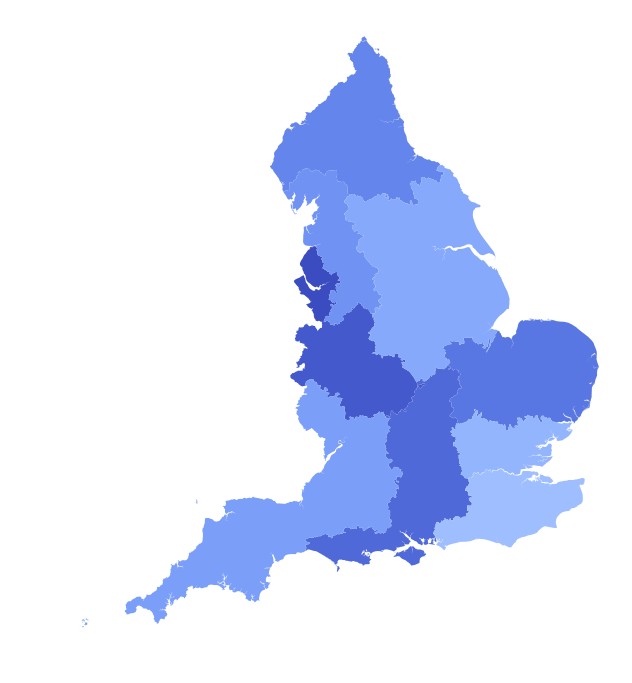

In [26]:
f, ax = plt.subplots(1, figsize=(20, 12))
ax = map_df2.plot(column='CATCHMENT', cmap= 'coolwarm', vmin = 0, vmax = 30, linewidth=0, ax=ax)
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = f.colorbar(sm)

plt.show()

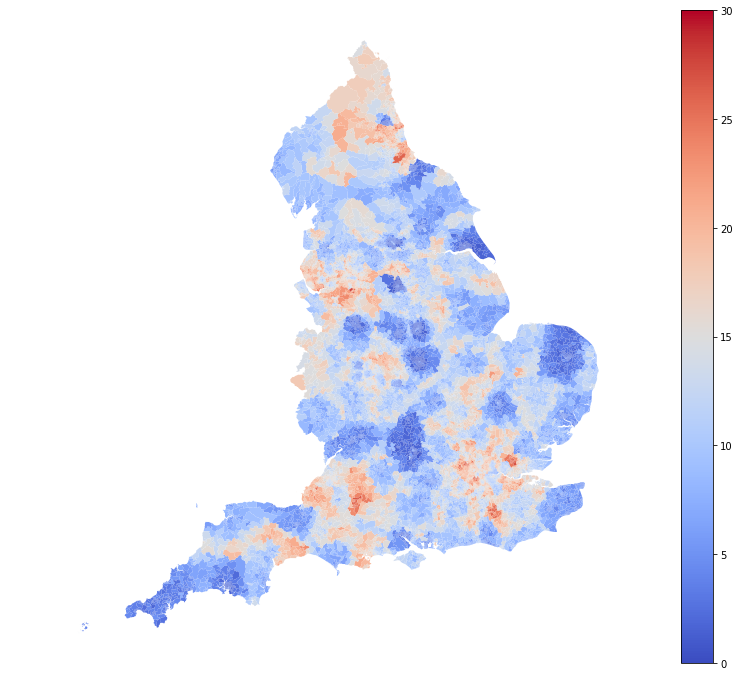

In [47]:
f, ax = plt.subplots(1, figsize=(20, 12))
ax = map_df.plot(column=variable, cmap= 'coolwarm', vmin = 0, vmax = 30, linewidth=0, ax=ax)
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = f.colorbar(sm)

plt.show()

In [61]:
f, ax = plt.subplots(1)
ax = map_df.plot(column=variable, cmap= 'viridis', vmin = 0, vmax = 30,ax=ax)
mplleaflet.show(fig=ax.figure, crs=map_df.crs)
#mplleaflet.show(path='MAP.html')

In [ ]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index(‘NAME’).join(data_for_map.set_index(‘borough’))
merged.head()

# set a variable that will call whatever column we want to visualise on the map
variable = ‘pop_density_per_hectare’
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')
            
# add a title
ax.set_title(‘Preventable death rate in London’, fontdict={‘fontsize’: ‘25’, ‘fontweight’ : ‘3’})
# create an annotation for the data source
ax.annotate(‘Source: London Datastore, 2014’,xy=(0.1, .08),  xycoords=’figure fraction’, horizontalalignment=’left’, verticalalignment=’top’, fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=’Blues’, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)